In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Dataset/boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Preparation and Multicolinearity Handling

### Data Cleaning

In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Split Data

In [12]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_train, target_df_train, test_size=0.20, random_state=42)

### Feature Correlation - VIF Check

In [13]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There are several features with high VIF scores (>3):

1. `indus`
2. `nox`
3. `dis`
4. `rad`
5. `tax`

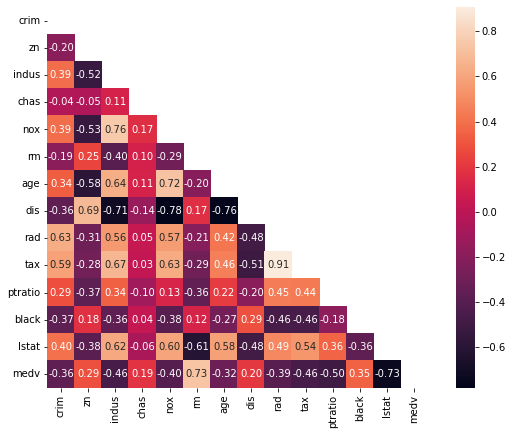

In [14]:
# heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', mask = mask, square=True)
plt.show()

From heatmap correlation map, we can seen that the variable with absolute correlation larger than 0.8 are **tax & rad** which are highly correlated with r value of -> 0.91, we need to only pick 1 and drop the others.

Other variables are below the 0.8 standard so we keep them as is

Since tax has higher correlation with target variable (medv) compared to rad, so we choose to keep tax and drop rad

We choose to retain `tax`. And, we need to drop:
* `rad`

In [15]:
# drop redundant features
feature_df_train = feature_df_train.drop(columns=['rad'])
feature_df_test = feature_df_test.drop(columns=['rad'])
feature_df_validation = feature_df_validation.drop(columns=['rad'])

## Recheck VIF

In [16]:
# re-calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


The result shows that better no VIF higher than 7 now, and since there is no variables with correlation higher than 0.8, we decide to not drop any variable

# Train Multiple Models
with different lambdas = [0.01, 0.1, 1, 10]

## Ridge

In [17]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_df_train.to_numpy()
y_medv_train = target_df_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg_001 = Ridge(alpha=0.01, random_state=42)
ridge_reg_01 = Ridge(alpha=0.1, random_state=42)
ridge_reg_1 = Ridge(alpha=1, random_state=42)
ridge_reg_10 = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_001.fit(X_medv_train, y_medv_train)
ridge_reg_01.fit(X_medv_train, y_medv_train)
ridge_reg_1.fit(X_medv_train, y_medv_train)
ridge_reg_10.fit(X_medv_train, y_medv_train)



Ridge(alpha=10, random_state=42)

### Choose Best Model using RMSE

In [18]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_df_validation.to_numpy()
y_medv_validation = target_df_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_001,
          ridge_reg_01,
          ridge_reg_1,
          ridge_reg_10]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}') #dipilih rmse yang paling kecil

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122791
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579991
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


The smallest value of RMSE is RMSE of Ridge regression model with alpha = 10

### Coefficient Tour - Ridge

In [19]:
model = ridge_reg_10 #lambda=10.0

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

# We now look at the coefficient of the model with best lambda

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


### Interpretation for Best Model

medv = 15.064666 - 0.071408 * crim + 0.033030 * zn -0.067858 * indus + 1.955801 * chas - 1.568248 * nox + 4.783168 * rm - 0.011523 * age - 1.260056 * dis - 0.001976 * tax - 0.697550 *pratio + 0.012729 * black - 0.523827 * lstat



*   For every 1 point increase in variable rm - average number of room per dwelling, (assuming other variables do not change), it has an association with an increase of 4.783168 point in median value medv (in USD 1000's).

*   For every 1 point increase in variable pratio - pupil teacher ratio in the neighborhood, assuming other variables do not change, it has an association with a decrease of 0.697550 point in median value medv (in USD 1000's)



## Lasso

In [26]:
from sklearn.linear_model import Lasso

# train the model
X_medv_train = feature_df_train.to_numpy()
y_medv_train = target_df_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
lasso_reg_001 = Lasso(alpha=0.01, random_state=42)
lasso_reg_01 = Lasso(alpha=0.1, random_state=42)
lasso_reg_1 = Lasso(alpha=1, random_state=42)
lasso_reg_10 = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_001.fit(X_medv_train, y_medv_train)
lasso_reg_01.fit(X_medv_train, y_medv_train)
lasso_reg_1.fit(X_medv_train, y_medv_train)
lasso_reg_10.fit(X_medv_train, y_medv_train)



Lasso(alpha=10, random_state=42)

### Choose Best Model using RMSE

In [24]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_df_validation.to_numpy()
y_medv_validation = target_df_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_001,
          lasso_reg_01,
          lasso_reg_1,
          lasso_reg_10]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}') #dipilih rmse yang paling kecil

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


The smallest value of RMSE is RMSE of Lasso regression model with alpha = 1.0

### Coefficient Tour - Lasso

In [25]:
model = lasso_reg_1 #lambda=1

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


# Model Evaluation

## Ridge

### Diagnostic Study

In [27]:
from sklearn.metrics import r2_score
ridge_best = ridge_reg_10

y_predict_train = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_medv_train)))

R-squared for training data is 0.6542246087727177


### Training Error

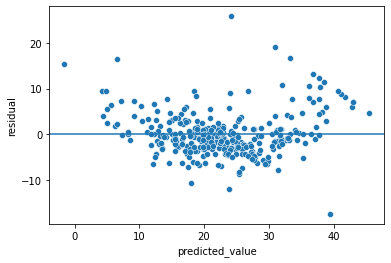

In [28]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

variance of residuals seems random -> no bias in residuals

In [30]:
# prepare prediction result on training data
y_predict_train = ridge_best.predict(X_medv_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_medv_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_medv_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_medv_train)))

RMSE for training data is 4.778640361040111
MAE for training data is 3.3776762058865626
MAPE for training data is 0.20627342943666688


Standard deviation of the residuals in the training data, is +/- 4.778640361040111 (from RSME)

### Testing Error

In [31]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_df_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_df_test)))

RMSE for testing data is 5.158908333657057
MAE for testing data is 3.2444816457044965
MAPE for testing data is 0.2622349874986081


Standard deviation of the residuals in the testing data, is +/- 5.158908333657057 (from RSME)

- Based on MAE, on average our prediction deviates the true medv value by 3.244 points (in USD 1000's) - so it is quite significant because the predication can be different in thousands of dollars
- Based on MAPE, this 3.244 points deviation is equivalent to 26% of deviation relative to true medv value. So, the model still have relatively large deviation but we will use standard of 30% to decide the model as not acceptable, so we conclude that the model still acceptable to predict medv value.

## Lasso

## Diagnostic Study

In [33]:
from sklearn.metrics import r2_score

lasso_best = lasso_reg_1

y_predict_train = lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_medv_train)))

R-squared for training data is 0.5133022055846548


51% of variance in the target medv is explained by all the feature in the model

### Training Error

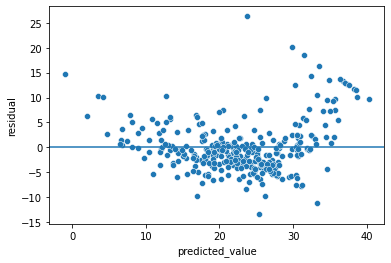

In [34]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()


variance of residuals seems random -> no bias in residuals

### Testing Error

In [35]:
# prepare prediction result on training data
y_predict_train = lasso_best.predict(X_medv_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_medv_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_medv_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_medv_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.2295469115534592


Standard deviation of the residuals in the training data, is +/- 5.170346463296143 (from RSME)

In [36]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_df_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_df_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.2950524268933147


Standard deviation of the residuals in the testing data, is +/- 5.125494212319777 (from RSME)

- Based on MAE, on average our prediction deviates the true medv value by 3.398 points (in USD 1000's) - so it is quite significant because the prediction can be different in thousands of dollars
- Based on MAPE, this 3.398 points deviation is equivalent to 29.505% of deviation relative to true medv value. So, the model still have relatively large deviation but we will use standard of 30% to decide the model as not acceptable, so we conclude that the model still acceptable to predict medv value.
- Here, if we compare ridge and lasso model, lasso model performs technically speaking slightly better 29.505% vs 26% deviation compared to true medv value and we generally accept both model because MAPE is still below in 30%.

Asumsi yang dipenuhi oleh model :
1. Hubungan Linear - Terpenuhi
2. Variance Stabil - Tidak Terpenuhi (Variance tidak konstan)
3. Observasi Independen - Terpenuhi (Residual Independen/Tidak ada pola tertentu)

The conclusion is that both models are acceptable. Ridge and Lasso models have almost the same training and testing values. But from the analysis above, I prefer to use Ridge model. because the difference in the value of RMSE training and testing is not too far away. MAPE values of the two models also almost the same.